In [17]:
import numpy as np

import matplotlib.pyplot as plt

import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

figsize = (18, 6)
fontsize_title = 24
fontsize_ax = 20
fontsize_legenda = 18
fontsize_ticks = 18



In [18]:
main_dir = "/data/mrando/svrz_results/synthetic_comp"

budget = 500000
gammas = np.logspace(-4, -1, 50)
inner_iterations = [25, 50, 100]

names = ['osvrz', 'zosvrg_ave', 'zosvrg_coord', 'szvr_g', 'zosvrg_cr', 'zospider_szo', 'zospider_coord']#, 'sszd', 'gauss_fd', 'sph_fd']

name_map = {
    'osvrz' : "O-SVRZ", 
    'zosvrg_ave' : "ZO-SVRG-Ave", 
    'zosvrg_coord' : "ZO-SVRG-Coord", 
    'szvr_g' : "SZVR-G", 
    'zosvrg_cr' : "ZO-SVRG-Coord-Rand", 
    'zospider_szo' : "ZO-Spider-SZO", 
    'zospider_coord': "ZO-Spider-Coord", 
    'sszd' : "S-SZD", 
    'gauss_fd' : "Gaussian FD", 
    'sph_fd' : "Spherical FD"
}


def read_param_tuning_results(dataset_name, path, l, m, L, mu):
    results = {}
    with open(f"{path}/{dataset_name}_{m}_{l}_{mu}_{L}.log") as f:
        for line in f.readlines():
            splitted = line.split(",")
            name = splitted[0]
            f0 = float(splitted[2])
            f_T = float(splitted[3]) 
            f_c = float(splitted[4])
            time_mu = float(splitted[5]) 
            time_std = float(splitted[6])

            f_T = f0 if f_T != f_T or f_T >= f0  else f_T 
            f_c = 1e-20 if f_T != f_T or f_c != f_c or  f_T >= f0  else f_c
            if name not in results:
                results[name] = ([f_T], [f_c], [time_mu], [time_std])
            else:
                results[name][0].append(f_T)
                results[name][1].append(f_c)
                results[name][2].append(time_mu)
                results[name][3].append(time_std)
    return results
                    

In [19]:
def plot_changing_l(num_directions, results_50, results_100, results_150, title, out_name):
    fig, (ax2, ax3, ax4) = plt.subplots(1, 3, figsize=figsize)

    fig.suptitle(title, fontsize=fontsize_title)

    # for (i, values) in enumerate(results_25):
    #     mu  = np.array(values[0])
    #     std = np.array(values[1])
    #     ax1.plot(gammas, mu, 'o-', label="$\\ell = {}$".format(num_directions[i]))
    #     ax1.fill_between(gammas, mu - std, mu + std, alpha=0.3)
    #     ax1.legend()

    for (i, values) in enumerate(results_50):
        mu  = np.array(values[0])
        std = np.array(values[1])
        ax2.plot(gammas, mu, 'o-', label="$\\ell = {}$".format(num_directions[i]))
        ax2.fill_between(gammas, mu - std, mu + std, alpha=0.3)
        ax2.legend()

    for (i, values) in enumerate(results_100):
        mu  = np.array(values[0])
        std = np.array(values[1])
        ax3.plot(gammas, mu, 'o-', label="$\\ell = {}$".format(num_directions[i]))
        ax3.fill_between(gammas, mu - std, mu + std, alpha=0.3)

    for (i, values) in enumerate(results_150):
        mu  = np.array(values[0])
        std = np.array(values[1])
        ax4.plot(gammas, mu, 'o-', label="$\\ell = {}$".format(num_directions[i]))
        ax4.fill_between(gammas, mu - std, mu + std, alpha=0.3)
        
        
    #ax1.set_title("$m = 25$", fontsize=fontsize_ax)
    ax2.set_title("$m = 50$", fontsize=fontsize_ax)
    ax3.set_title("$m = 100$", fontsize=fontsize_ax)
    ax4.set_title("$m = 150$", fontsize=fontsize_ax)

    # ax1.set_ylabel("$F(x^T_0)$", fontsize=fontsize_ax)
    # ax1.set_xlabel("$\\gamma$", fontsize=fontsize_ax)
    # ax1.set_yscale("log")
    # ax1.set_xscale("log")
    ax2.legend(loc='lower left',fontsize=fontsize_legenda)

    ax2.set_ylabel("$F(x^T_0)$", fontsize=fontsize_ax)
    ax2.set_xlabel("$\\gamma$", fontsize=fontsize_ax)
    ax2.set_yscale("log")
    ax2.set_xscale("log")

    ax3.set_ylabel("$F(x^T_0)$", fontsize=fontsize_ax)
    ax3.set_xlabel("$\\gamma$", fontsize=fontsize_ax)
    ax3.set_yscale("log")
    ax3.set_xscale("log")

    ax4.set_ylabel("$F(x^T_0)$", fontsize=fontsize_ax)
    ax4.set_xlabel("$\\gamma$", fontsize=fontsize_ax)
    ax4.set_yscale("log")
    ax4.set_xscale("log")

    ax2.tick_params(labelsize=fontsize_ticks)
    ax3.tick_params(labelsize=fontsize_ticks)
    ax4.tick_params(labelsize=fontsize_ticks)

    fig.tight_layout()
    fig.savefig(f"{out_name}", bbox_inches='tight')


# Changing Number of directions

buget = 50000 

In [20]:
num_directions = [100, 80, 60, 50, 40, 20, 1]
num_directions = num_directions[::-1]
results_25   = [read_param_tuning_results("least_squares_osvrz", f"{main_dir}/param_tuning", l, m=25, L=100, mu = 1)['osvrz'] for l in num_directions]
results_50   = [read_param_tuning_results("least_squares_osvrz", f"{main_dir}/param_tuning", l, m=50, L=100, mu = 1)['osvrz'] for l in num_directions]
results_100  = [read_param_tuning_results("least_squares_osvrz", f"{main_dir}/param_tuning", l, m=100, L=100, mu = 1)['osvrz'] for l in num_directions]

len(results_100[0][0])

50

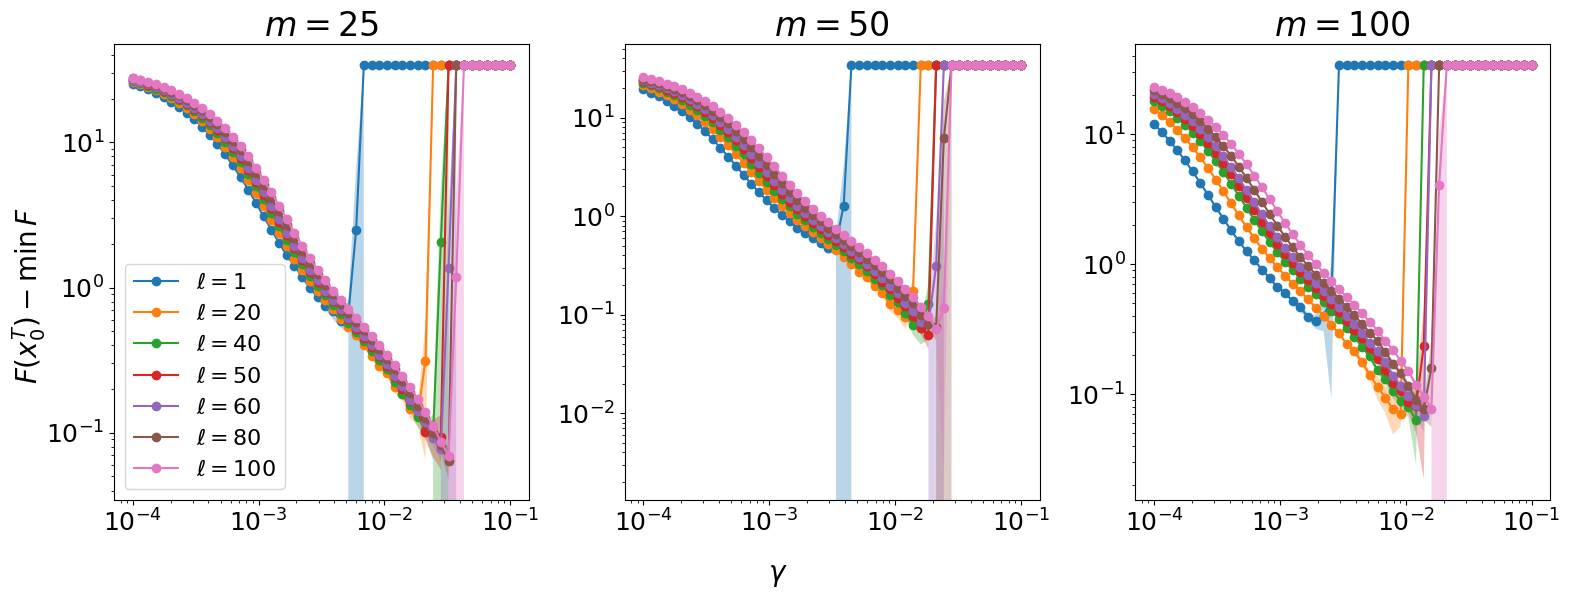

In [33]:

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 6))
for i in range(len(results_25)):
    mu = np.array(results_25[i][0])
    std = np.array(results_25[i][1])
    ax1.plot(gammas[:mu.shape[0]], mu, 'o-', label="$\\ell = {}$".format(num_directions[i]), rasterized=True)
    ax1.fill_between(gammas[:mu.shape[0]], mu - std, mu + std, alpha=0.3, rasterized=True)

for i in range(len(results_50)):
    mu = np.array(results_50[i][0])
    std = np.array(results_50[i][1])
    ax2.plot(gammas[:mu.shape[0]], mu, 'o-', label="$\\ell = {}$".format(num_directions[i]), rasterized=True)
    ax2.fill_between(gammas[:mu.shape[0]], mu - std, mu + std, alpha=0.3, rasterized=True)
    
for i in range(len(results_100)):
    mu = np.array(results_100[i][0])
    std = np.array(results_100[i][1])
    ax3.plot(gammas[:mu.shape[0]], mu, 'o-', label="$\\ell = {}$".format(num_directions[i]), rasterized=True)
    ax3.fill_between(gammas[:mu.shape[0]], mu - std, mu + std, alpha=0.3, rasterized=True)


ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_title("$m = 25$", fontsize=fontsize_title)


ax2.set_xscale("log")
ax2.set_yscale("log")
ax2.set_title("$m = 50$", fontsize=fontsize_title)


ax3.set_xscale("log")
ax3.set_yscale("log")
ax3.set_title("$m = 100$", fontsize=fontsize_title)

ax1.tick_params(labelsize=fontsize_ticks)
ax2.tick_params(labelsize=fontsize_ticks)
ax3.tick_params(labelsize=fontsize_ticks)


fig.supxlabel("$\gamma$", fontsize=fontsize_ax)
fig.supylabel("$F(x^T_0) - \\min \\, F$", fontsize=fontsize_ax)

ax1.legend(loc='lower left', fontsize=16)

fig.tight_layout()
fig.savefig("./osrvz_changing_gamma.pdf", bbox_inches='tight')


In [22]:
ltimes_mu = [[] for _ in range(len(num_directions))]
ltimes_std = [[] for _ in range(len(num_directions))]
for i in range(len(results_25)):
    ltimes_mu[i].append(results_25[i][2][0])
    ltimes_std[i].append(results_25[i][3][0])
    
for i in range(len(results_50)):
    ltimes_mu[i].append(results_50[i][2][0])
    ltimes_std[i].append(results_50[i][3][0])
    
for i in range(len(results_100)):
    ltimes_mu[i].append(results_100[i][2][0])
    ltimes_std[i].append(results_100[i][3][0])


In [31]:
full_ris_25 = []
for i in range(len(results_25)):
    min_idx = np.argmin(results_25[i][0])
    mu_values, std_values = [],[]
    with open(f"{main_dir}/full_results/osvrz_25_{num_directions[i]}_{gammas[min_idx]}_{1}_{100}.log", 'r') as f:
        for line in f.readlines():
            splitted = line.split(',')
            mu_values += [float(splitted[0]) for _ in range(int(splitted[-1]))]
            std_values += [float(splitted[1]) for _ in range(int(splitted[-1]))]
    full_ris_25.append((mu_values[:budget], std_values[:budget]))
    
full_ris_50 = []
for i in range(len(results_50)):
    min_idx = np.argmin(results_50[i][0])
    mu_values, std_values = [],[]
    with open(f"{main_dir}/full_results/osvrz_50_{num_directions[i]}_{gammas[min_idx]}_{1}_{100}.log", 'r') as f:
        for line in f.readlines():
            splitted = line.split(',')
            mu_values += [float(splitted[0]) for _ in range(int(splitted[-1]))]
            std_values += [float(splitted[1]) for _ in range(int(splitted[-1]))]
    full_ris_50.append((mu_values[:budget], std_values[:budget]))
    
    
full_ris_100 = []
for i in range(len(results_100)):
    min_idx = np.argmin(results_100[i][0])
    mu_values, std_values = [],[]
    with open(f"{main_dir}/full_results/osvrz_100_{num_directions[i]}_{gammas[min_idx]}_{1}_{100}.log", 'r') as f:
        for line in f.readlines():
            splitted = line.split(',')
            mu_values += [float(splitted[0]) for _ in range(int(splitted[-1]))]
            std_values += [float(splitted[1]) for _ in range(int(splitted[-1]))]
    full_ris_100.append((mu_values[:budget], std_values[:budget]))

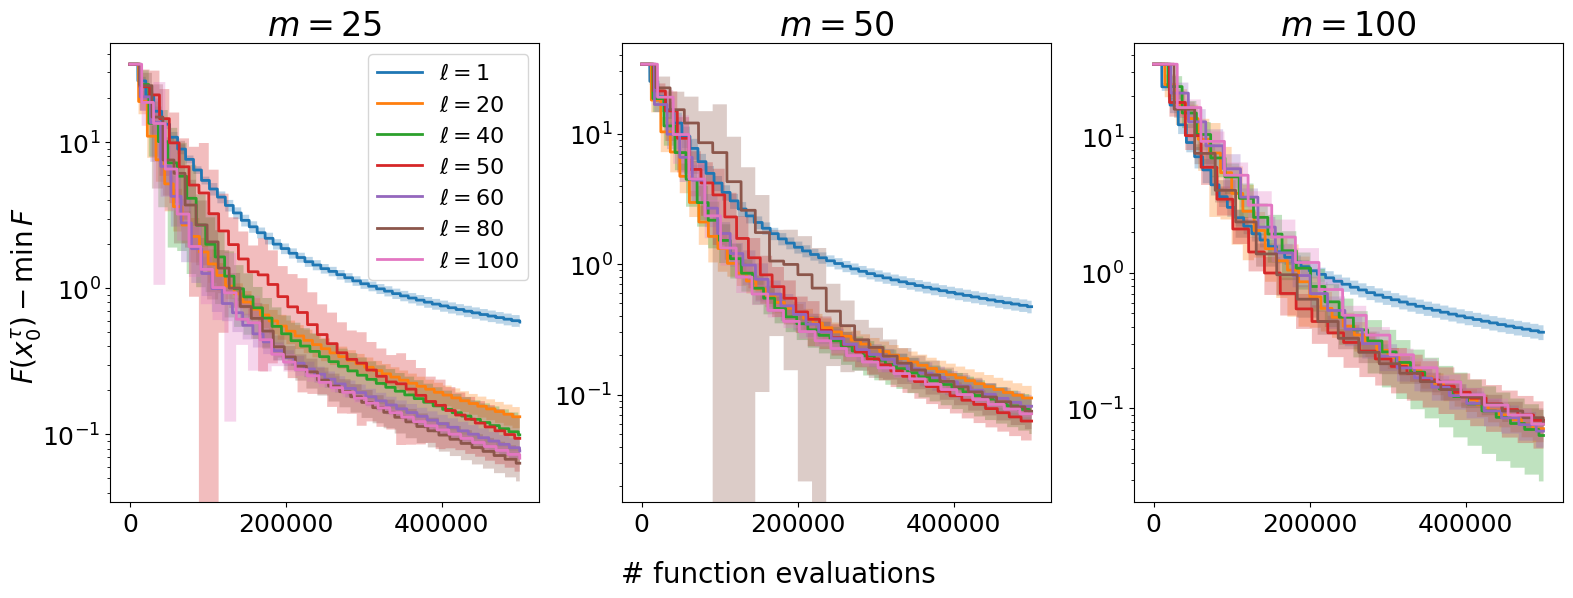

In [32]:

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 6))
for i in range(len(full_ris_25)):
    mu = np.array(full_ris_25[i][0])
    std = np.array(full_ris_25[i][1])
    ax1.plot(range(mu.shape[0]), mu, '-', lw=2, label="$\\ell = {}$".format(num_directions[i]), rasterized=True)
    ax1.fill_between(range(mu.shape[0]), mu - std, mu + std, alpha=0.3, rasterized=True)

for i in range(len(full_ris_50)):
    mu = np.array(full_ris_50[i][0])
    std = np.array(full_ris_50[i][1])
    ax2.plot(range(mu.shape[0]), mu, '-', lw=2, label="$\\ell = {}$".format(num_directions[i]), rasterized=True)
    ax2.fill_between(range(mu.shape[0]), mu - std, mu + std, alpha=0.3, rasterized=True)
    
for i in range(len(full_ris_100)):
    mu = np.array(full_ris_100[i][0])
    std = np.array(full_ris_100[i][1])
    ax3.plot(range(mu.shape[0]), mu, '-', lw=2, label="$\\ell = {}$".format(num_directions[i]), rasterized=True)
    ax3.fill_between(range(mu.shape[0]), mu - std, mu + std, alpha=0.3, rasterized=True)


#ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_title("$m = 25$", fontsize=fontsize_title)


#ax2.set_xscale("log")
ax2.set_yscale("log")
ax2.set_title("$m = 50$", fontsize=fontsize_title)


#ax3.set_xscale("log")
ax3.set_yscale("log")
ax3.set_title("$m = 100$", fontsize=fontsize_title)

ax1.tick_params(labelsize=fontsize_ticks)
ax2.tick_params(labelsize=fontsize_ticks)
ax3.tick_params(labelsize=fontsize_ticks)


fig.supxlabel("# function evaluations", fontsize=fontsize_ax)
fig.supylabel("$F(x^\\tau_0) - \\min \\, F$", fontsize=fontsize_ax)

ax1.legend(loc='upper right', fontsize=16)

fig.tight_layout()
fig.savefig("./osrvz_changing_l.pdf", bbox_inches='tight')


# Synthetic Comparison

# IJCNN1

In [5]:
result_dir = f"{main_dir}/ijcnn1/param_tuning"
dataset_name = 'ijcnn1'
d = 22
num_directions = [d // i for i in [10, 5, 4, 3, 2, 1]] 



## OSVRZ: Changing l

In [6]:
#results_25  = [read_param_tuning_results(dataset_name, result_dir, l, m=25)['osvrz'] for l in num_directions]
results_50  = [read_param_tuning_results(dataset_name, result_dir, l, m=50)['osvrz'] for l in num_directions]
results_100 = [read_param_tuning_results(dataset_name, result_dir, l, m=100)['osvrz'] for l in num_directions]
results_150 = [read_param_tuning_results(dataset_name, result_dir, l, m=150)['osvrz'] for l in num_directions]



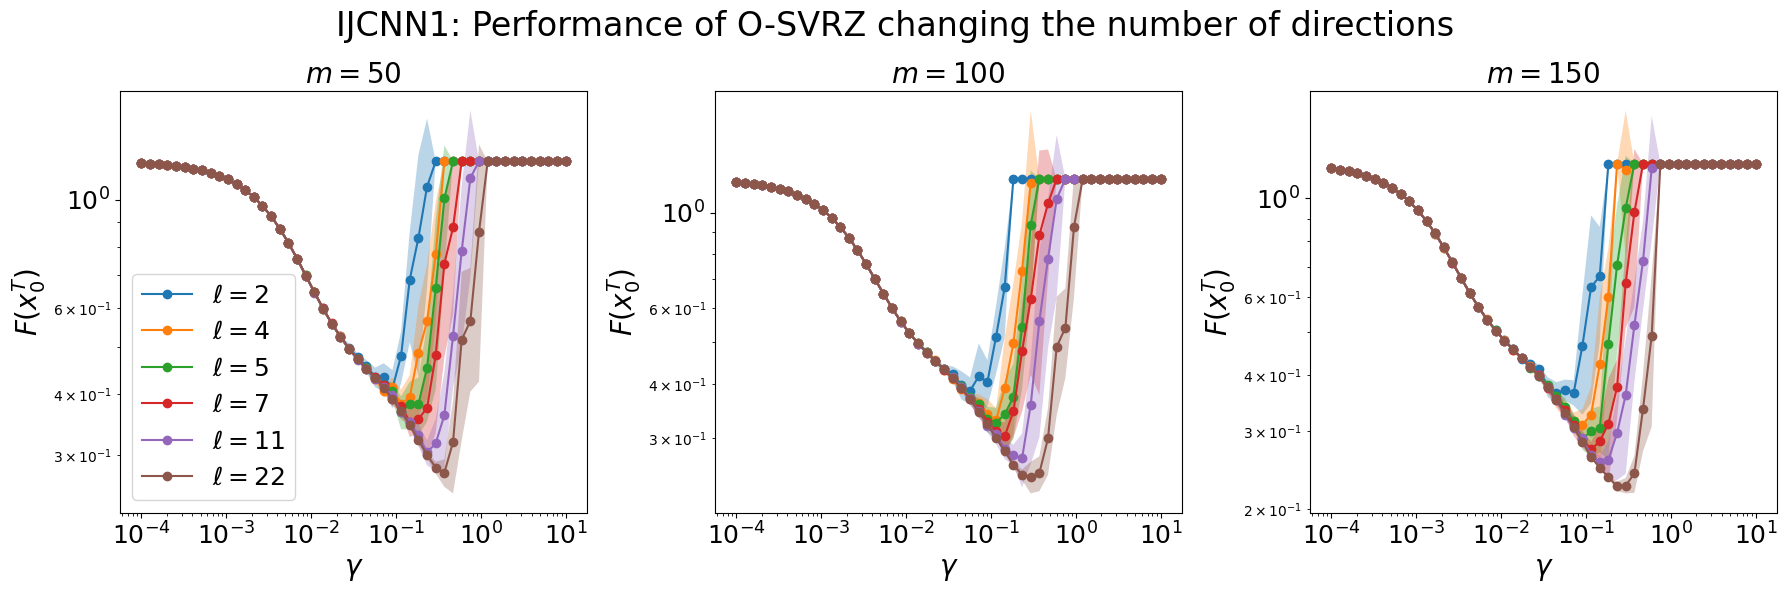

In [7]:
plot_changing_l(num_directions, results_50, results_100, results_150, "IJCNN1: Performance of O-SVRZ changing the number of directions", "./osvrg_changing_l_ijcnn1.pdf")



## PHISHING

In [8]:
result_dir = f"{main_dir}/phishing/param_tuning"
dataset_name = 'phishing'
d = 68
num_directions = [d // i for i in [10, 5, 4, 3, 2, 1]] 



In [9]:
#results_25  = [read_param_tuning_results(dataset_name, result_dir, l, m=25)['osvrz'] for l in num_directions]
results_50  = [read_param_tuning_results(dataset_name, result_dir, l, m=50)['osvrz'] for l in num_directions]
results_100 = [read_param_tuning_results(dataset_name, result_dir, l, m=100)['osvrz'] for l in num_directions]
results_150 = [read_param_tuning_results(dataset_name, result_dir, l, m=150)['osvrz'] for l in num_directions]



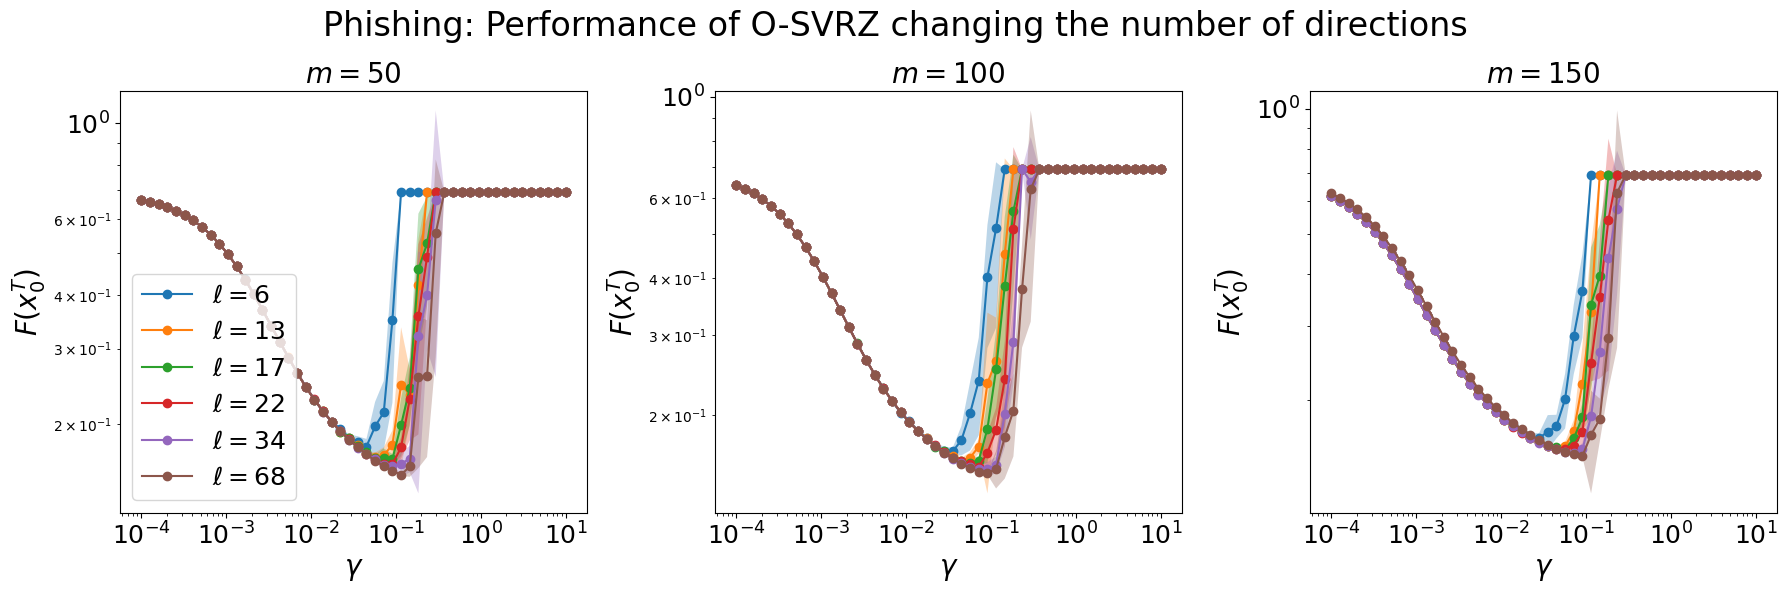

In [10]:
plot_changing_l(num_directions, results_50, results_100, results_150, "Phishing: Performance of O-SVRZ changing the number of directions", "./osvrg_changing_l_phishing.pdf")

# PLOTS: W1A

In [11]:
result_dir = f"{main_dir}/w1a/param_tuning"
dataset_name = 'w1a'
d = 300
num_directions = [d // i for i in [10, 5, 4, 3, 2, 1]] 



In [12]:
#results_25  = [read_param_tuning_results(dataset_name, result_dir, l, m=25)['osvrz'] for l in num_directions]
results_50  = [read_param_tuning_results(dataset_name, result_dir, l, m=50)['osvrz'] for l in num_directions]
results_100 = [read_param_tuning_results(dataset_name, result_dir, l, m=100)['osvrz'] for l in num_directions]
results_150 = [read_param_tuning_results(dataset_name, result_dir, l, m=150)['osvrz'] for l in num_directions]



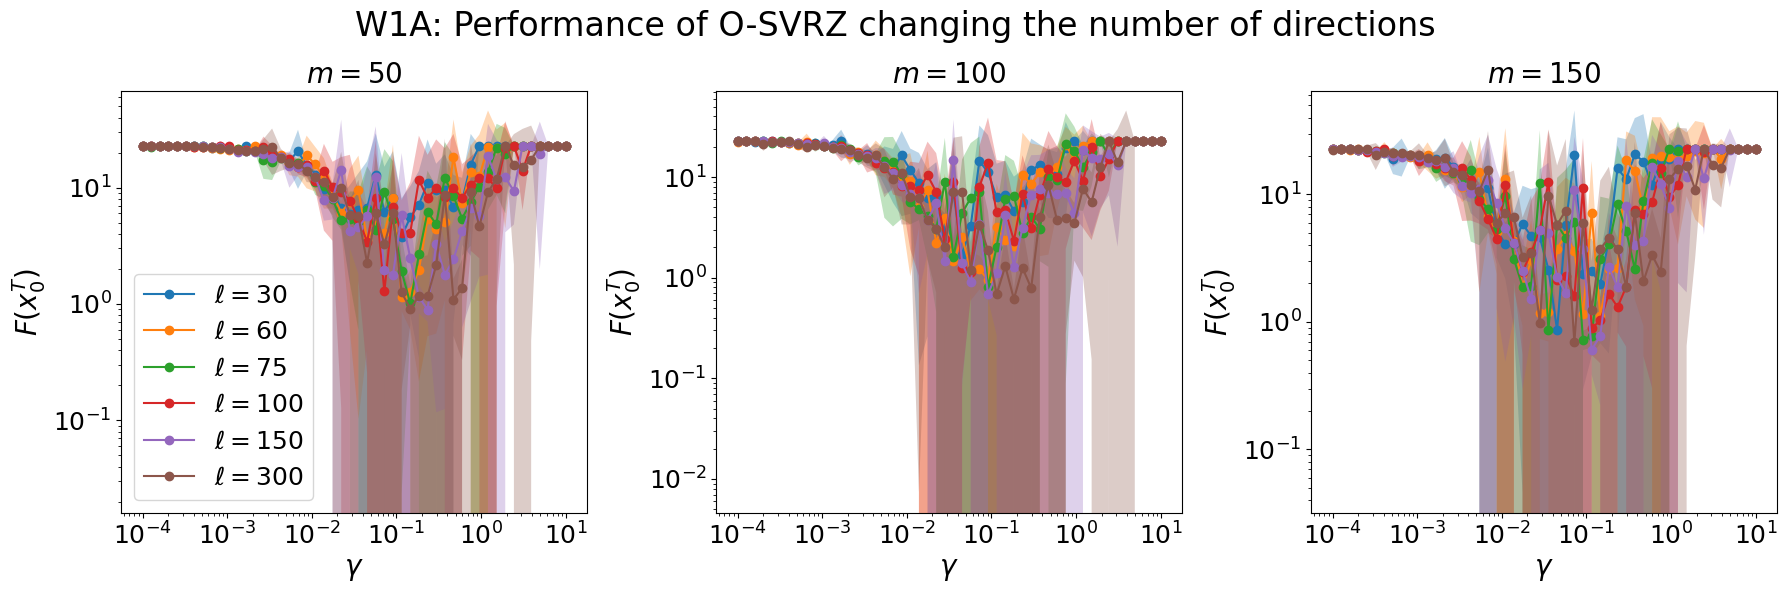

In [13]:
plot_changing_l(num_directions, results_50, results_100, results_150, "W1A: Performance of O-SVRZ changing the number of directions", "./osvrg_changing_l_w1a.pdf")

In [10]:

for name in names[1:]:
    results_25  = [read_param_tuning_results(dataset_name, result_dir, l, m=25)[name] for l in num_directions]
    results_50  = [read_param_tuning_results(dataset_name, result_dir, l, m=50)[name] for l in num_directions]
    results_100 = [read_param_tuning_results(dataset_name, result_dir, l, m=100)[name] for l in num_directions]

    mu  = np.array(osvrz_results_25[0])
    std = np.array(osvrz_results_25[1])


    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 6))
    fig.suptitle(f"IJCNN1: Comparison with {name_map[name]}")
    ax1.plot(gammas, mu, 'o-', label="osvrz [$\ell = 5$]")
    ax1.fill_between(gammas, mu - std, mu + std, alpha=0.3)

    for (i, values) in enumerate(results_25):
        mu  = np.array(values[0])
        std = np.array(values[1])
        ax1.plot(gammas, mu, 'o-', label="$\\ell = {}$".format(num_directions[i]))
        ax1.fill_between(gammas, mu - std, mu + std, alpha=0.3)
        ax1.legend()

    mu  = np.array(osvrz_results_50[0])
    std = np.array(osvrz_results_50[1])
    ax2.plot(gammas, mu, 'o-', label="osvrz [$\ell = 22$]")
    ax2.fill_between(gammas, mu - std, mu + std, alpha=0.3)
    for (i, values) in enumerate(results_50):
        mu  = np.array(values[0])
        std = np.array(values[1])
        ax2.plot(gammas, mu, 'o-', label="$\\ell = {}$".format(num_directions[i]))
        ax2.fill_between(gammas, mu - std, mu + std, alpha=0.3)

    mu  = np.array(osvrz_results_100[0])
    std = np.array(osvrz_results_100[1])
    ax3.plot(gammas, mu, 'o-', label="osvrz [$\ell = 22$]")
    ax3.fill_between(gammas, mu - std, mu + std, alpha=0.3)
    for (i, values) in enumerate(results_100):
        mu  = np.array(values[0])
        std = np.array(values[1])
        ax3.plot(gammas, mu, 'o-', label="$\\ell = {}$".format(num_directions[i]))
        ax3.fill_between(gammas, mu - std, mu + std, alpha=0.3)
        
        
    ax1.set_title("$m = 25$")
    ax2.set_title("$m = 50$")
    ax3.set_title("$m = 100$")

    ax1.set_ylabel("$F(x^T_0)$")
    ax1.set_xlabel("$\\gamma$")
    ax1.set_yscale("log")
    ax1.set_xscale("log")
    ax1.legend(loc='lower left')



    ax2.set_ylabel("$F(x^T_0)$")
    ax2.set_xlabel("$\\gamma$")
    ax2.set_yscale("log")
    ax2.set_xscale("log")


    ax3.set_ylabel("$F(x^T_0)$")
    ax3.set_xlabel("$\\gamma$")
    ax3.set_yscale("log")
    ax3.set_xscale("log")



    fig.tight_layout()
    fig.savefig(f"./osvrg_vs_{name}_ijcnn1.png", bbox_inches='tight')
    plt.close(fig)


In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.set_title("Function values")
ax2.set_title("Cumulative Computational Cost")

for (label, path) in methods:
    ris = read_result(budget, path)
    mu_values, std_values = ris['values']
    mu_times,  std_times  = ris['times']
    
    ax1.plot(range(len(mu_values)), mu_values, '-', label=label)
    ax1.fill_between(range(len(mu_values)), mu_values - std_values, mu_values + std_values, alpha=0.6)
    ax2.plot(range(len(mu_times)), mu_times, '-', label=label)
    ax2.fill_between(range(len(mu_times)), mu_times - std_times, mu_times + std_times, alpha=0.6)
    ris = None

ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.legend(loc='upper right')

ax1.set_xlabel("# stochastic function values", fontsize=12)
ax1.set_ylabel("$F(x^\\tau) - F(x^*)$", fontsize=12)

ax2.set_xlabel("# stochastic function values", fontsize=12)
ax2.set_ylabel("Cost (s)", fontsize=12)

fig.tight_layout()
fig.savefig("test.png", bbox_inches='tight')


In [6]:
d = 50
gammas = [1e-5, 1e-3, 1e-2, 1e-2, 1.0]#[0.0001, 0.0005, 0.001, 0.005]#, 0.01, 0.05, 0.1, 0.5]
inner_iters = [5, 25, 50]
num_directions = [1] + [i for i in range(5, d + 5, 5)]
gammas = np.logspace(-4, -1, 30)

out_dir = "./results/changing_gamma/"

opt_names = ['osvrz']


In [34]:
num_directions = [1] + [i for i in range(10, d + 10, 10)]


results_25 = [read_results(out_dir, l, 25) for l in num_directions]
results_50 = [read_results(out_dir, l, 50) for l in num_directions]
results_75 = [read_results(out_dir, l, 75) for l in num_directions]

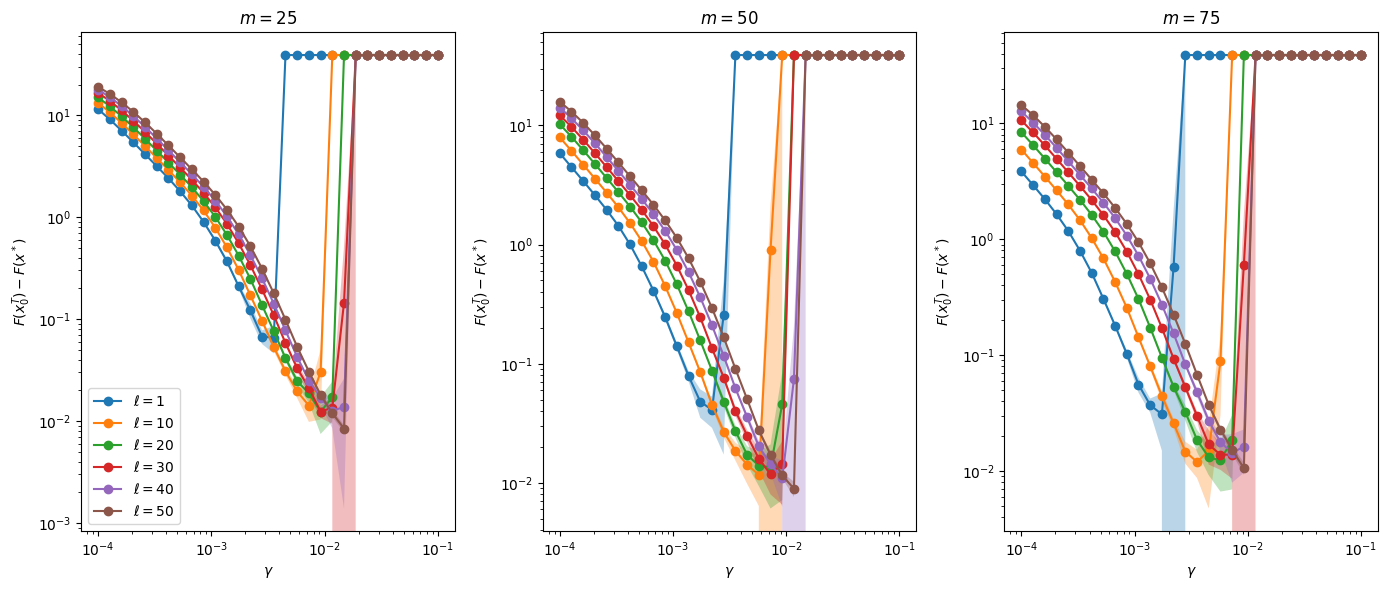

In [35]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 6))
for (i, result) in enumerate(results_25):
    values = result['osvrz']
    mu  = np.array(values[0])
    std = np.array(values[1])
    ax1.plot(gammas, mu, 'o-', label="$\\ell = {}$".format(num_directions[i]))
    ax1.fill_between(gammas, mu - std, mu + std, alpha=0.3)

for result in results_50:
    values = result['osvrz']
    mu  = np.array(values[0])
    std = np.array(values[1])
    ax2.plot(gammas, mu,'o-', label="$\\ell = {}$".format(num_directions[i]))
    ax2.fill_between(gammas, mu - std, mu + std, alpha=0.3)

for result in results_75:
    values = result['osvrz']
    mu  = np.array(values[0])
    std = np.array(values[1])
    ax3.plot(gammas, mu,'o-', label="$\\ell = {}$".format(num_directions[i]))
    ax3.fill_between(gammas, mu - std, mu + std, alpha=0.3)


ax1.set_title("$m = 25$")
ax2.set_title("$m = 50$")
ax3.set_title("$m = 75$")

ax1.set_ylabel("$F(x^T_0) - F(x^*)$")
ax1.set_xlabel("$\\gamma$")
ax1.set_yscale("log")
ax1.set_xscale("log")
ax1.legend(loc='lower left')



ax2.set_ylabel("$F(x^T_0) - F(x^*)$")
ax2.set_xlabel("$\\gamma$")
ax2.set_yscale("log")
ax2.set_xscale("log")


ax3.set_ylabel("$F(x^T_0) - F(x^*)$")
ax3.set_xlabel("$\\gamma$")
ax3.set_yscale("log")
ax3.set_xscale("log")



fig.tight_layout()
fig.savefig("./osvrg_changing_gamma.png", bbox_inches='tight')

In [31]:
osvrz_results_25 = read_results(out_dir, 10, 25)['osvrz'] #for l in num_directions]
osvrz_results_50 = read_results(out_dir, 10, 50)['osvrz'] #for l in num_directions]
osvrz_results_75 = read_results(out_dir, 10, 75)['osvrz'] #for l in num_directions]

num_directions_zosvrgcr = [1,  10, 25, 50, 75]

results_zo_svrg_cr_25 = [read_results(out_dir, l, 25) for l in num_directions_zosvrgcr]
results_zo_svrg_cr_50 = [read_results(out_dir, l, 50) for l in num_directions_zosvrgcr]
results_zo_svrg_cr_75 = [read_results(out_dir, l, 75) for l in num_directions_zosvrgcr]



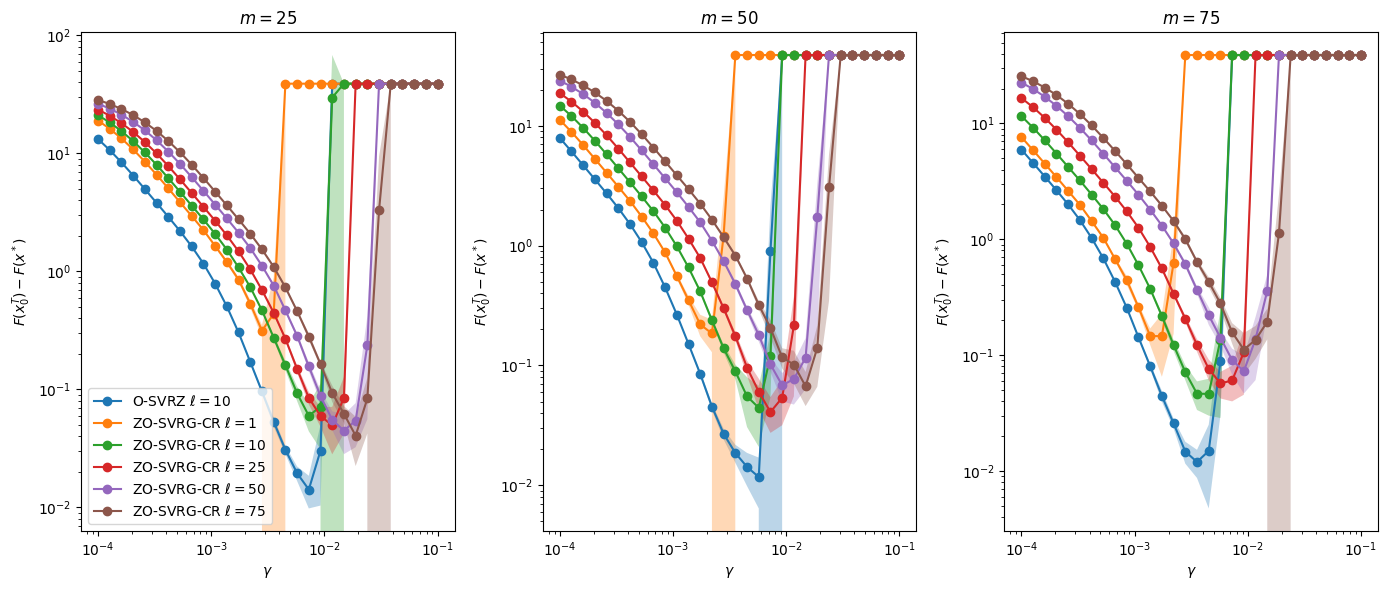

In [33]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 6))
mu  = np.array(osvrz_results_25[0])
std = np.array(osvrz_results_25[1])

ax1.plot(gammas, mu, 'o-', label="O-SVRZ $\\ell = 10$")
ax1.fill_between(gammas, mu - std, mu + std, alpha=0.3)

for (i, result) in enumerate(results_zo_svrg_cr_25):
    values = result['zo_svrg_cr']
    mu  = np.array(values[0])
    std = np.array(values[1])
    ax1.plot(gammas, mu, 'o-', label="ZO-SVRG-CR $\\ell = {}$".format(num_directions_zosvrgcr[i]))
    ax1.fill_between(gammas, mu - std, mu + std, alpha=0.3)


mu  = np.array(osvrz_results_50[0])
std = np.array(osvrz_results_50[1])

ax2.plot(gammas, mu, 'o-', label="O-SVRZ $\\ell = 10$")
ax2.fill_between(gammas, mu - std, mu + std, alpha=0.3)


for (i, result) in enumerate(results_zo_svrg_cr_50):
    values = result['zo_svrg_cr']
    mu  = np.array(values[0])
    std = np.array(values[1])
    ax2.plot(gammas, mu, 'o-', label="ZO-SVRG-CR $\\ell = {}$".format(num_directions_zosvrgcr[i]))
    ax2.fill_between(gammas, mu - std, mu + std, alpha=0.3)



mu  = np.array(osvrz_results_75[0])
std = np.array(osvrz_results_75[1])

ax3.plot(gammas, mu, 'o-', label="O-SVRZ $\\ell = 10$")
ax3.fill_between(gammas, mu - std, mu + std, alpha=0.3)

for (i, result) in enumerate(results_zo_svrg_cr_75):
    values = result['zo_svrg_cr']
    mu  = np.array(values[0])
    std = np.array(values[1])
    ax3.plot(gammas, mu, 'o-', label="ZO-SVRG-CR $\\ell = {}$".format(num_directions_zosvrgcr[i]))
    ax3.fill_between(gammas, mu - std, mu + std, alpha=0.3)




ax1.set_title("$m = 25$")
ax2.set_title("$m = 50$")
ax3.set_title("$m = 75$")

ax1.set_ylabel("$F(x^T_0) - F(x^*)$")
ax1.set_xlabel("$\\gamma$")
ax1.set_yscale("log")
ax1.set_xscale("log")
ax1.legend(loc='lower left')



ax2.set_ylabel("$F(x^T_0) - F(x^*)$")
ax2.set_xlabel("$\\gamma$")
ax2.set_yscale("log")
ax2.set_xscale("log")


ax3.set_ylabel("$F(x^T_0) - F(x^*)$")
ax3.set_xlabel("$\\gamma$")
ax3.set_yscale("log")
ax3.set_xscale("log")



fig.tight_layout()
fig.savefig("./osvrz_vs_zosvrgcr_gamma.png", bbox_inches='tight')

# Comparison with SZRV-G

In [12]:
osvrz_results_25 = read_results(out_dir, 10, 25)['osvrz'] #for l in num_directions]
osvrz_results_50 = read_results(out_dir, 10, 50)['osvrz'] #for l in num_directions]
osvrz_results_75 = read_results(out_dir, 10, 75)['osvrz'] #for l in num_directions]

num_directions_zosvrgcr = [1, 10, 25, 50, 75]#, 25, 50, 75]

results_szrvg_25 = [read_results(out_dir, l, 25) for l in num_directions_zosvrgcr]
results_szrvg_50 = [read_results(out_dir, l, 50) for l in num_directions_zosvrgcr]
results_szrvg_75 = [read_results(out_dir, l, 75) for l in num_directions_zosvrgcr]



In [13]:
len(results_szrvg_75[1]['szrv_g'][0]), len(gammas)

(30, 30)

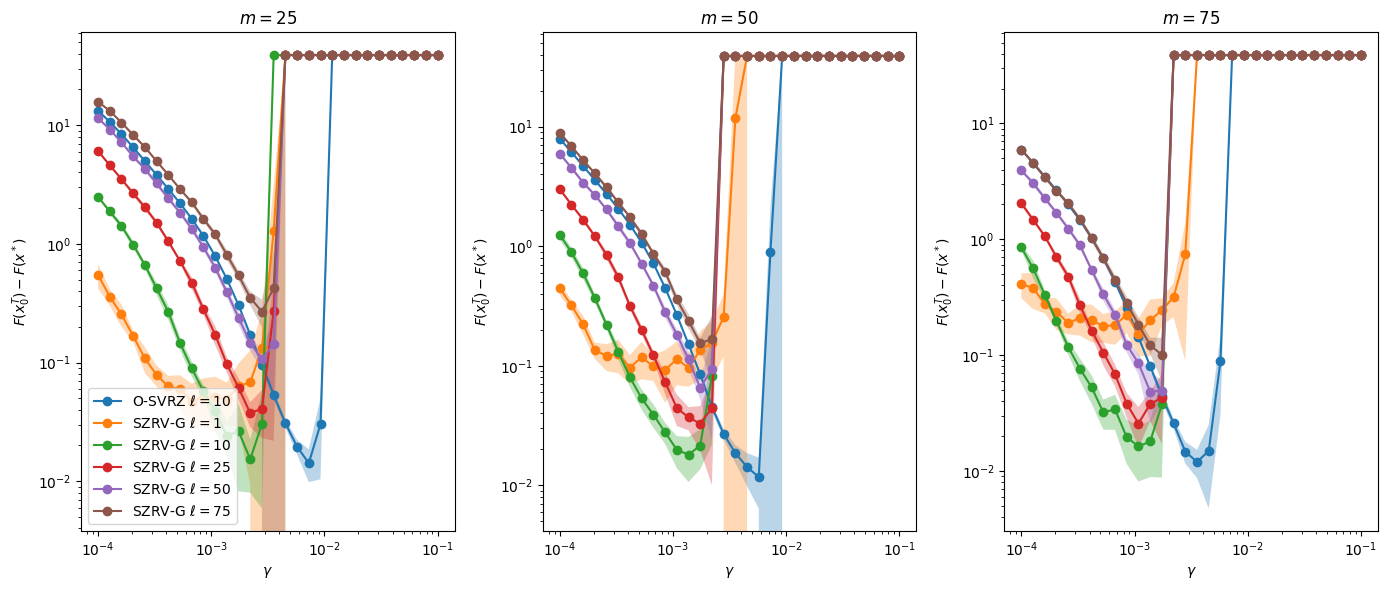

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 6))
mu  = np.array(osvrz_results_25[0])
std = np.array(osvrz_results_25[1])

ax1.plot(gammas, mu, 'o-', label="O-SVRZ $\\ell = 10$")
ax1.fill_between(gammas, mu - std, mu + std, alpha=0.3)


for (i, result) in enumerate(results_szrvg_25):
    values = result['szrv_g']
    mu  = np.array(values[0])
    std = np.array(values[1])
    ax1.plot(gammas, mu, 'o-', label="SZRV-G $\\ell = {}$".format(num_directions_zosvrgcr[i]))
    ax1.fill_between(gammas, mu - std, mu + std, alpha=0.3)


mu  = np.array(osvrz_results_50[0])
std = np.array(osvrz_results_50[1])

ax2.plot(gammas, mu, 'o-', label="O-SVRZ $\\ell = 10$")
ax2.fill_between(gammas, mu - std, mu + std, alpha=0.3)


for (i, result) in enumerate(results_szrvg_50):
    values = result['szrv_g']
    mu  = np.array(values[0])
    std = np.array(values[1])
    ax2.plot(gammas, mu, 'o-', label="SZRV-G $\\ell = {}$".format(num_directions_zosvrgcr[i]))
    ax2.fill_between(gammas, mu - std, mu + std, alpha=0.3)



mu  = np.array(osvrz_results_75[0])
std = np.array(osvrz_results_75[1])

ax3.plot(gammas, mu, 'o-', label="O-SVRZ $\\ell = 10$")
ax3.fill_between(gammas, mu - std, mu + std, alpha=0.3)

for (i, result) in enumerate(results_szrvg_75):
    values = result['szrv_g']
    mu  = np.array(values[0])
    std = np.array(values[1])
    ax3.plot(gammas, mu, 'o-', label="SZRV-G $\\ell = {}$".format(num_directions_zosvrgcr[i]))
    ax3.fill_between(gammas, mu - std, mu + std, alpha=0.3)




ax1.set_title("$m = 25$")
ax2.set_title("$m = 50$")
ax3.set_title("$m = 75$")

ax1.set_ylabel("$F(x^T_0) - F(x^*)$")
ax1.set_xlabel("$\\gamma$")
ax1.set_yscale("log")
ax1.set_xscale("log")
ax1.legend(loc='lower left')



ax2.set_ylabel("$F(x^T_0) - F(x^*)$")
ax2.set_xlabel("$\\gamma$")
ax2.set_yscale("log")
ax2.set_xscale("log")


ax3.set_ylabel("$F(x^T_0) - F(x^*)$")
ax3.set_xlabel("$\\gamma$")
ax3.set_yscale("log")
ax3.set_xscale("log")



fig.tight_layout()
fig.savefig("./osvrz_vs_szvrg.png", bbox_inches='tight')

# Comparison with ZO-SVRG-Ave

In [16]:
osvrz_results_25 = read_results(out_dir, 10, 25)['osvrz'] #for l in num_directions]
osvrz_results_50 = read_results(out_dir, 10, 50)['osvrz'] #for l in num_directions]
osvrz_results_75 = read_results(out_dir, 10, 75)['osvrz'] #for l in num_directions]

num_directions_zosvrgcr = [1, 10, 25, 50, 75]#, 25, 50, 75]

results_zosvrgave_25 = [read_results(out_dir, l, 25) for l in num_directions_zosvrgcr]
results_zosvrgave_50 = [read_results(out_dir, l, 50) for l in num_directions_zosvrgcr]
results_zosvrgave_75 = [read_results(out_dir, l, 75) for l in num_directions_zosvrgcr]



In [17]:
len(results_zosvrgave_75[0]['zo_svrg_ave'][1]), len(gammas)

(30, 30)

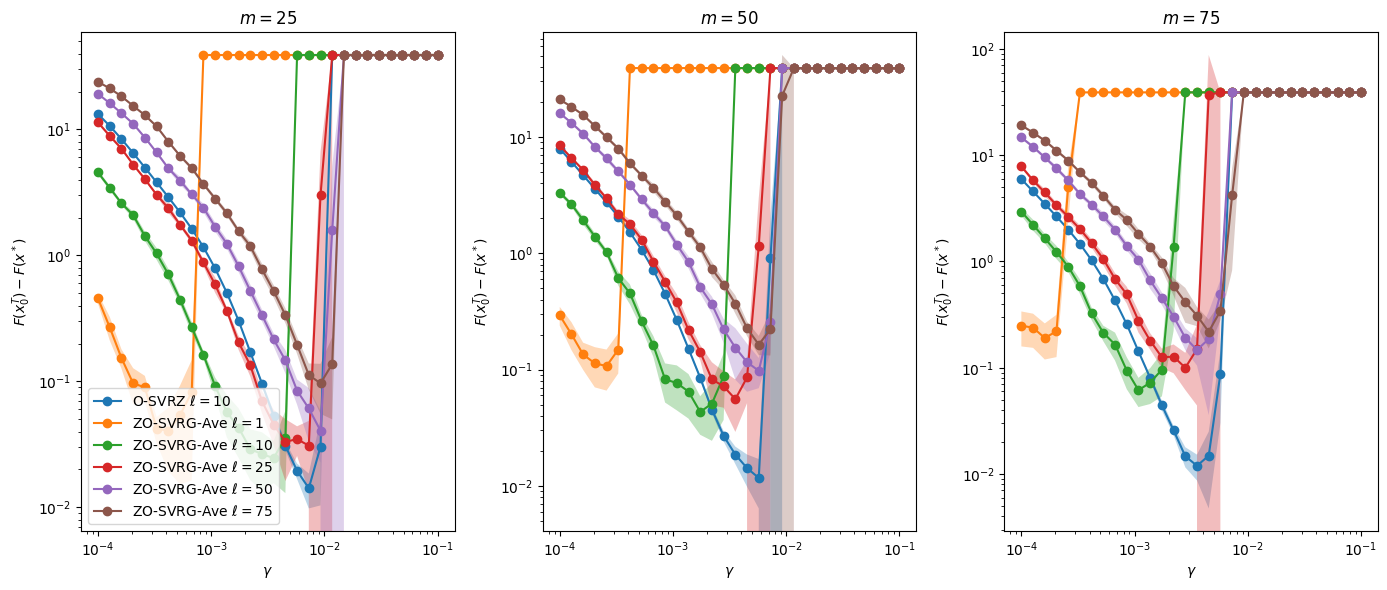

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 6))
mu  = np.array(osvrz_results_25[0])
std = np.array(osvrz_results_25[1])

ax1.plot(gammas, mu, 'o-', label="O-SVRZ $\\ell = 10$")
ax1.fill_between(gammas, mu - std, mu + std, alpha=0.3)


for (i, result) in enumerate(results_zosvrgave_25):
    values = result['zo_svrg_ave']
    mu  = np.array(values[0])
    std = np.array(values[1])
    ax1.plot(gammas, mu, 'o-', label="ZO-SVRG-Ave $\\ell = {}$".format(num_directions_zosvrgcr[i]))
    ax1.fill_between(gammas, mu - std, mu + std, alpha=0.3)


mu  = np.array(osvrz_results_50[0])
std = np.array(osvrz_results_50[1])

ax2.plot(gammas, mu, 'o-', label="O-SVRZ $\\ell = 10$")
ax2.fill_between(gammas, mu - std, mu + std, alpha=0.3)


for (i, result) in enumerate(results_zosvrgave_50):
    values = result['zo_svrg_ave']
    mu  = np.array(values[0])
    std = np.array(values[1])
    ax2.plot(gammas, mu, 'o-', label="ZO-SVRG-Ave $\\ell = {}$".format(num_directions_zosvrgcr[i]))
    ax2.fill_between(gammas, mu - std, mu + std, alpha=0.3)



mu  = np.array(osvrz_results_75[0])
std = np.array(osvrz_results_75[1])

ax3.plot(gammas, mu, 'o-', label="O-SVRZ $\\ell = 10$")
ax3.fill_between(gammas, mu - std, mu + std, alpha=0.3)

for (i, result) in enumerate(results_zosvrgave_75):
    values = result['zo_svrg_ave']
    mu  = np.array(values[0])
    std = np.array(values[1])
    ax3.plot(gammas, mu, 'o-', label="ZO-SVRG-Ave $\\ell = {}$".format(num_directions_zosvrgcr[i]))
    ax3.fill_between(gammas, mu - std, mu + std, alpha=0.3)




ax1.set_title("$m = 25$")
ax2.set_title("$m = 50$")
ax3.set_title("$m = 75$")

ax1.set_ylabel("$F(x^T_0) - F(x^*)$")
ax1.set_xlabel("$\\gamma$")
ax1.set_yscale("log")
ax1.set_xscale("log")
ax1.legend(loc='lower left')



ax2.set_ylabel("$F(x^T_0) - F(x^*)$")
ax2.set_xlabel("$\\gamma$")
ax2.set_yscale("log")
ax2.set_xscale("log")


ax3.set_ylabel("$F(x^T_0) - F(x^*)$")
ax3.set_xlabel("$\\gamma$")
ax3.set_yscale("log")
ax3.set_xscale("log")



fig.tight_layout()
fig.savefig("./osvrz_vs_zosvrgave_gamma.png", bbox_inches='tight')